# **Distribuições Estatísticas.**


**prof: Sérgio Assunção Monteiro, D.Sc**

**linkedin:** https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

**lattes:** http://lattes.cnpq.br/9489191035734025

# **Séries Temporais (Introdução)**

In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
n = 100
df = pd.DataFrame(dict(data=pd.date_range("2020-1-1", 
                                           periods=n),
                       valor=np.random.randint(5, 80, n)))

In [22]:
df.head()

,data,valor
0,2020-01-01,24
1,2020-01-02,57
2,2020-01-03,64
3,2020-01-04,5
4,2020-01-05,6


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    100 non-null    datetime64[ns]
 1   valor   100 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


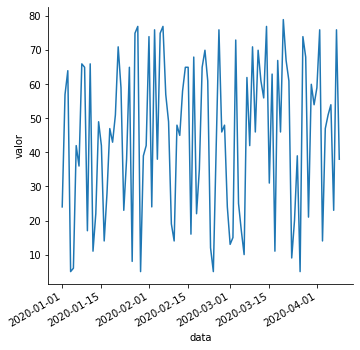

In [24]:
g = sns.relplot(x="data", 
                y="valor", 
                kind="line", 
                data=df)

g.figure.autofmt_xdate()

In [25]:
#Transformar data em índice
pd.Data = pd.to_datetime(df.data)
df.set_index('data', inplace=True)

In [26]:
df.head()

,valor
data,
2020-01-01,24
2020-01-02,57
2020-01-03,64
2020-01-04,5
2020-01-05,6


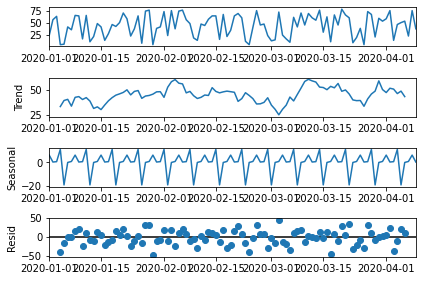

In [27]:
#decomposição no modelo aditivo
result = seasonal_decompose(df, model='additive')  
result.plot();                                     

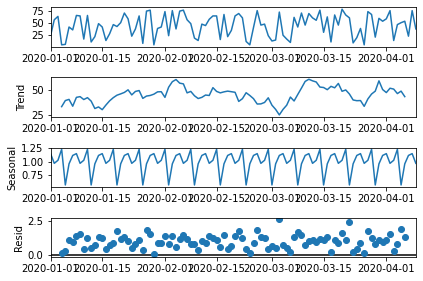

In [28]:
# decompõe a série de acordo com o modelo multiplicativo 
result = seasonal_decompose(df, model='multiplicative')
result.plot();

# **Distribuição Normal**

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

**Exemplo 01**

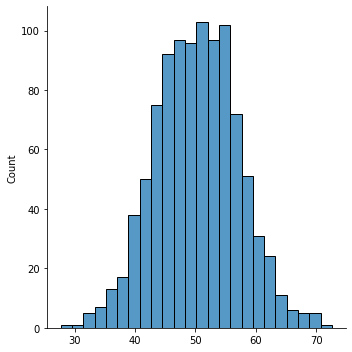

In [19]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

x=random.normal(loc=50, scale=7, size=1000)
sns.displot(x, label='normal')
plt.show()

**Exemplo 02**

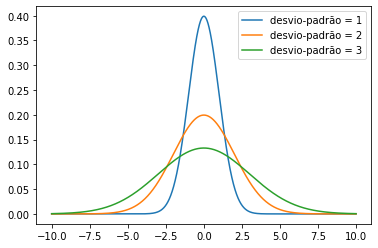

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

xs = np.arange(-10, 10, 0.001)

media = 0
for desvio_padrao in range(1, 4):
    plt.plot(xs,
             norm.pdf(xs, media, desvio_padrao),
             label = 'desvio-padrão = {0}'.format(desvio_padrao)
             )

plt.legend()
plt.show()

**Exemplo 03**

probabilidade entre -1.5 e 1.5 : 0.866385597462284


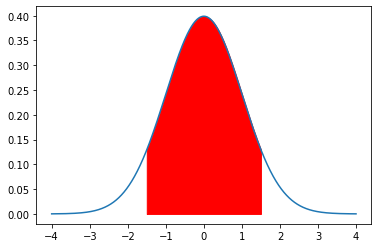

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.integrate as integrate

media = 0
funcao_distribuicao = lambda x: norm.pdf(x, media)
x1 = -1.5
x2 = 1.5

print('probabilidade entre {0} e {1} :'.format(x1, x2), 
      integrate.quad(funcao_distribuicao, x1, x2)[0])
passo = 0.001
intervalo_x = np.arange(-4, 4, passo)
intervalo_y = funcao_distribuicao(intervalo_x)

necessario_x = np.arange(x1, x2, passo)
necessario_y = funcao_distribuicao(necessario_x)
plt.plot(intervalo_x, intervalo_y)
plt.fill_between(necessario_x, necessario_y, color='r')
plt.show()

# **Distribuição de Poisson**

https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html

**Exemplo 01**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


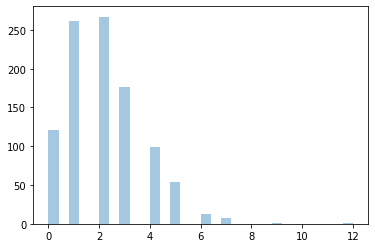

In [16]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
x=random.poisson(lam=2, size=1000)
sns.distplot(x, kde=False)

plt.show()

**Exemplo 02**

A probabilidade do evento ocorrer é de 2% em 10 minutos


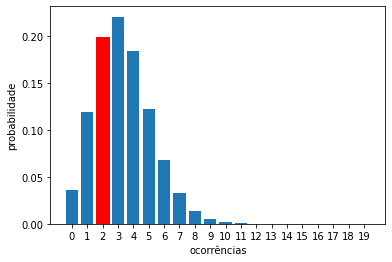

In [15]:
from math import exp, factorial
import matplotlib.pyplot as plt

def probabilidade(media, ocorrencias):
    return (media**ocorrencias * exp(-media)) / factorial(ocorrencias)

ocorrencias = 2
periodo = 10
tempo_em_horas = 20
horas_em_minutos = 60
media = (periodo * tempo_em_horas) / horas_em_minutos

info_str = 'A probabilidade do evento ocorrer é de {0}% em {1} minutos'
print(info_str.format(ocorrencias, periodo, probabilidade(media, ocorrencias)))

ocorrencias_para_exibir = range(20)
plt.xlabel('ocorrências')
plt.ylabel('probabilidade')
bars = plt.bar(
    ocorrencias_para_exibir,
    height=[probabilidade(media, x) for x in ocorrencias_para_exibir],
    tick_label=ocorrencias_para_exibir
)
bars[ocorrencias].set_color('r')

**Exemplo 03**

Número médio em horas:  10


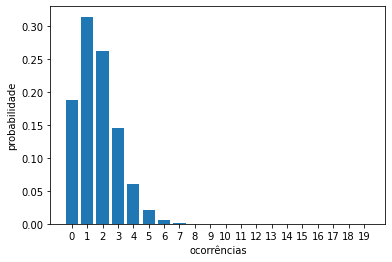

Número médio em horas:  20


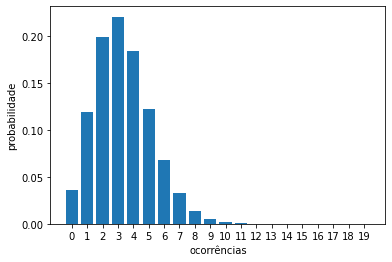

Número médio em horas:  30


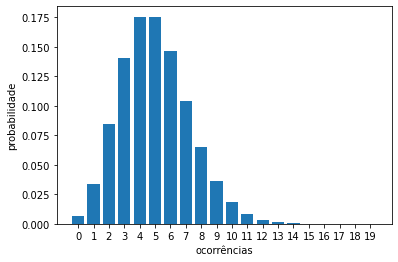

Número médio em horas:  40


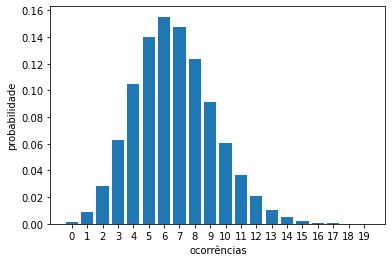

Número médio em horas:  50


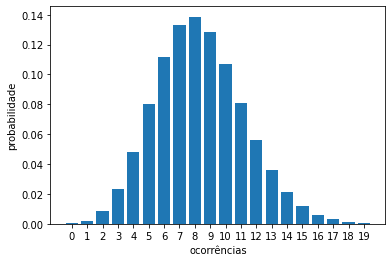

In [14]:
from math import exp, factorial
import matplotlib.pyplot as plt

def probabilidade(media, ocorrencias):
    return (media**ocorrencias * exp(-media)) / factorial(ocorrencias)

ocorrencias = 2
periodo = 10


for tempo_em_horas in [10, 20, 30, 40, 50]:
    print('Número médio em horas: ', tempo_em_horas)
    minutos_em_horas = 60
    media = (periodo * tempo_em_horas) / minutos_em_horas

    ocorrencias_para_exibir = range(20)
    plt.xlabel('ocorrências')
    plt.ylabel('probabilidade')
    bars = plt.bar(
        ocorrencias_para_exibir,
        height=[probabilidade(media, x) for x in ocorrencias_para_exibir],
        tick_label=ocorrencias_para_exibir
    )
    plt.show()

# **Distribuição Exponencial Negativa**

**Exemplo 01**

A probabilidade do evento ocorrer é de 2% em 0.4965853037914095 minutos


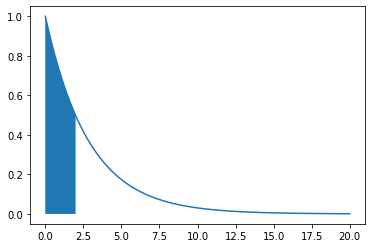

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

def probabilidade(media, periodo):
    return exp(-media * periodo)

media = 35/100
periodo = 2
info_str = 'A probabilidade do evento ocorrer é de {0}% em {1} minutos'
print(info_str.format(periodo, probabilidade(media, periodo)))

passo = 0.01
intervalo_x = np.arange(0, 20, passo)
intervalo_y = [probabilidade(media, x) for x in intervalo_x]

necessario_x = np.arange(0, 2, passo)
necessario_y = intervalo_y[:len(necessario_x)]

plt.plot(intervalo_x, intervalo_y)
plt.fill_between(necessario_x, necessario_y)

plt.show()

# **Distribuição Binomial**

**Exemplo 01**

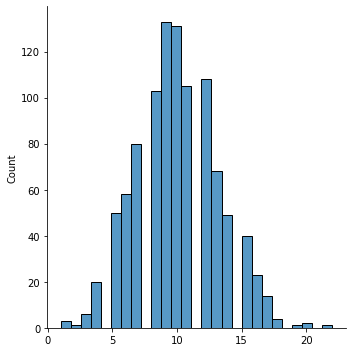

In [10]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(random.binomial(n=1000, p=0.01, size=1000), label='binomial')
plt.show()

# **Distribuição Uniforme**

source: https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html


**Exemplo 01**

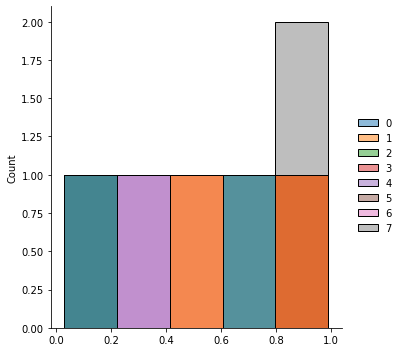

[[0.19325112 0.47658443 0.21018751 0.83159493 0.02892194 0.9150937
  0.63430093 0.83248274]
 [0.78107087 0.84498996 0.69212623 0.42578416 0.26474719 0.15962226
  0.40830034 0.99049654]]


In [9]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

x = random.uniform(size=(2, 8))
sns.displot(x)
plt.show()
print(x)

**Exemplo 02**

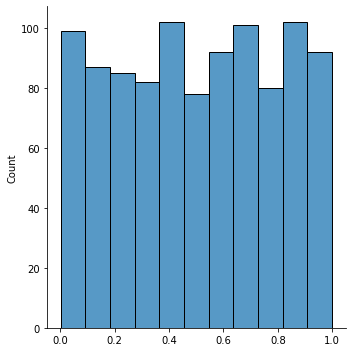

In [17]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
x = random.uniform(size=1000)
sns.displot(x)

plt.show()

# **Teste de Normalidade**

Testa se uma amostra de dados tem uma distribuição gaussiana.

Suposições:

As observações em cada amostra são independentes e identicamente distribuídas (iid).
Interpretação

H0: a amostra tem distribuição gaussiana.

H1: a amostra não tem distribuição gaussiana.

**Teste de Shapiro-Wilk**


In [8]:
from scipy.stats import shapiro
import numpy as np

dados = np.array([0.273, 1.517, 0.151, -0.641, -0.045, -1.236, 0.360, -1.478, -1.637, -1.869])
stat, p = shapiro(dados)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probabilidade Gaussiana')
else:
	print('Probabilidade Não-Gaussiana')

stat=0.938, p=0.532
Probabilidade Gaussiana


**Teste de D’Agostino’s K^2**



In [7]:
from scipy.stats import normaltest
import numpy as np

dados = np.array([0.972, 1.517, 0.121, -0.955, -0.055, -1.436, 0.330, -1.478, -1.637, -1.869])
stat, p = normaltest(dados)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probabilidade Gaussiana')
else:
	print('Probabilidade Não-Gaussiana')

stat=1.546, p=0.462
Probabilidade Gaussiana


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


**Teste de Anderson-Darling**

In [5]:
from scipy.stats import anderson
import numpy as np

dados = np.array([0.925, 2.817, 0.121, -0.945, -0.755, -0.236, 0.370, -1.488, -2.637, -1.859])
result = anderson(dados)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.174
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


# **Testes de Correlação**

**Coeficiente de Correlação de Pearson’s**

Testa se duas amostras têm uma relação linear.

Suposições:

As observações em cada amostra são independentes e identicamente distribuídas (iid).
As observações em cada amostra são normalmente distribuídas.
As observações em cada amostra têm a mesma variância.

Interpretação:

H0: as duas amostras são independentes.

H1: existe uma dependência entre as amostras.

In [3]:
from scipy.stats import pearsonr
import numpy as np

dados1 = np.array([1.753, 2.887, 1.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869])
dados2 = np.array([2.057, 3.567, 0.145, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579])
stat, p = pearsonr(dados1, dados2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probabilidade independente')
else:
	print('Probabilidade dependente')

stat=0.710, p=0.021
Probabilidade dependente


**Teste de Correlação de Spearman’s**

Testa se duas amostras têm uma relação monotônica.

Suposições:

As observações em cada amostra são independentes e identicamente distribuídas (iid).
As observações em cada amostra podem ser classificadas.

Interpretação:

H0: as duas amostras são independentes.

H1: existe uma dependência entre as amostras.

In [2]:
from scipy.stats import spearmanr
import numpy as np
dados1 = np.array([1.753, 2.887, 1.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869])
dados2 = np.array([2.057, 3.567, 0.145, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579])
stat, p = spearmanr(dados1, dados2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probabilidade independente')
else:
	print('Probabilidade dependente')

stat=0.830, p=0.003
Probabilidade dependente


**Teste de do Ranque de Correlação de Kendall’s**

Testa se duas amostras têm uma relação monotônica.

Suposições:

As observações em cada amostra são independentes e identicamente distribuídas (iid).
As observações em cada amostra podem ser classificadas.

Interpretação:

H0: as duas amostras são independentes.

H1: existe uma dependência entre as amostras.

In [20]:
from scipy.stats import kendalltau
import numpy as np

data1 = np.array([0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869])
data2 = np.array([0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579])
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probabilidade independente')
else:
	print('Probabilidade dependente')

stat=0.733, p=0.002
Probabilidade dependente


**Teste de Qui-Quadrado**

Testa se duas variáveis categóricas são relacionadas ou independentes.

Suposições:

As observações utilizadas no cálculo da tabela de contingência são independentes.
25 ou mais exemplos em cada célula da tabela de contingência.

Interpretação:

H0: as duas amostras são independentes.

H1: existe uma dependência entre as amostras.

In [21]:
from scipy.stats import chi2_contingency
import numpy as np

tabela = np.array([[10, 20, 30],[6,  9,  17]])
stat, p, dof, expected = chi2_contingency(tabela)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probabilidade independente')
else:
	print('Probabilidade dependente')

stat=0.272, p=0.873
Probabilidade independente


# **Teste de Estacionariedade**

**Teste de Dickey-Fuller Aumentado**

Testa se uma série temporal tem uma raiz unitária, por exemplo tem uma tendência ou, mais geralmente, é autorregressivo.

Suposições:

As observações em são ordenadas temporalmente.

Interpretação:

H0: uma raiz unitária está presente (a série não é estacionária).

H1: uma raiz unitária não está presente (a série é estacionária).

In [23]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

dados = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
stat, p, lags, obs, crit, t = adfuller(dados)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probabilidade não estacionária')
else:
	print('Probabilidade estacionária')

stat=0.517, p=0.985
Probabilidade não estacionária


**Teste de Kwiatkowski-Phillips-Schmidt-Shin**

Testa se uma série temporal é uma tendência estacionária ou não.

Suposições:

As observações em são ordenadas temporalmente.

Interpretação:

H0: a série temporal é estacionária de tendência.

H1: a série temporal não é estacionária de tendência.

In [1]:
from statsmodels.tsa.stattools import kpss
import numpy as np

dados = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
stat, p, lags, crit = kpss(dados,nlags="auto")
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probabilidade estacionária')
else:
	print('Probabilidade não estacionária')

stat=0.594, p=0.023
Probabilidade não estacionária
